In [2]:
!pip install -U bitsandbytes

✓ All packages loaded correctly!

GPU Information:
GPU: Tesla T4
VRAM: 14.74 GB

Login to Hugging Face:
Get your token from: https://huggingface.co/settings/tokens



Configuration:
Model: stabilityai/stable-diffusion-xl-base-1.0
Dataset: lambdalabs/naruto-blip-captions
Resolution: 768x768
Training steps: 3000
LoRA Rank: 16
Noise Offset: 0.1
Random Crop: True
Output: /kaggle/working/naruto

Loading Naruto dataset from Hugging Face...


Repo card metadata block was not found. Setting CardData to empty.


Loaded 1221 images

Sample caption: a man with dark hair and brown eyes


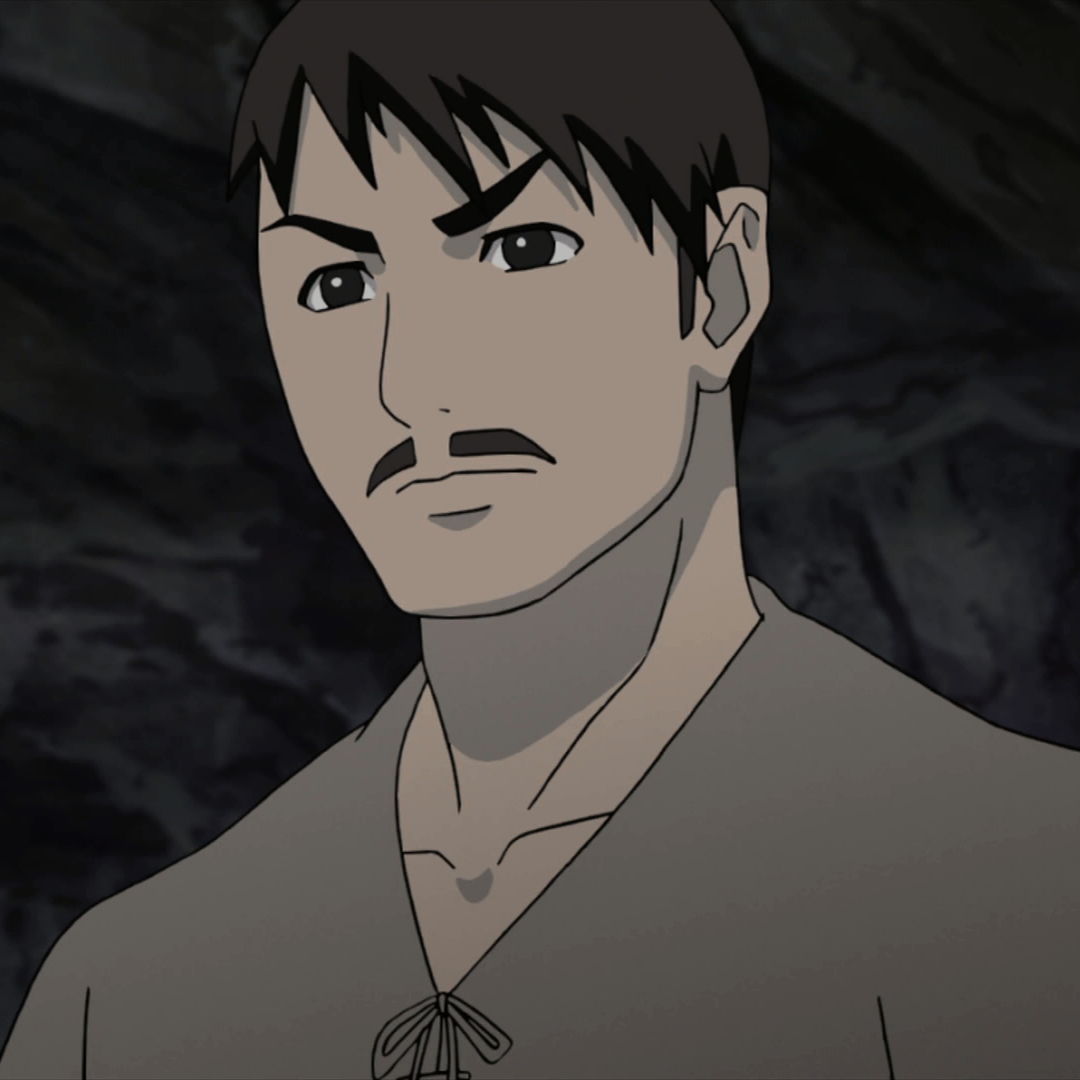

Dataset ready: 1221 images at 768x768

Loading SDXL models (this takes 3-5 minutes)...


2025-11-28 16:53:10.220354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764348790.243101     143 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764348790.249787     143 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Loading VAE in float32 for stability...


text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

The Models loaded

Adding LoRA layers to UNet...
Adding LoRA to text_encoder...
trainable params: 1,179,648 || all params: 124,240,128 || trainable%: 0.9495
Adding LoRA to text_encoder_2...
trainable params: 5,242,880 || all params: 699,902,720 || trainable%: 0.7491
trainable params: 28,825,600 || all params: 2,596,289,284 || trainable%: 1.1103

Enabling memory optimizations...
Using PyTorch native scaled_dot_product_attention (optimized for T4)
Gradient checkpointing enabled
VAE slicing and tiling enabled

Setting up training...


scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

DataLoader ready: 1221 batches per epoch
Training for 3000 steps (~2.5 hours)

Starting training...



  0%|          | 0/3000 [00:00<?, ?it/s]

Step 50/3000 | Loss: 0.0913 | LR: 1.20e-05
Step 100/3000 | Loss: 0.0858 | LR: 2.50e-05
Step 150/3000 | Loss: 0.1072 | LR: 3.70e-05
Step 200/3000 | Loss: 0.0957 | LR: 5.00e-05
Step 250/3000 | Loss: 0.1091 | LR: 6.20e-05
Step 300/3000 | Loss: 0.1089 | LR: 7.50e-05
Step 350/3000 | Loss: 0.0840 | LR: 8.70e-05
Step 400/3000 | Loss: 0.1098 | LR: 1.00e-04
Step 450/3000 | Loss: 0.0946 | LR: 1.00e-04
Step 500/3000 | Loss: 0.0948 | LR: 1.00e-04
CHECKPOINT SAVED → /kaggle/working/naruto/checkpoint-500
Step 550/3000 | Loss: 0.1146 | LR: 1.00e-04
Step 600/3000 | Loss: 0.0904 | LR: 9.99e-05
Step 650/3000 | Loss: 0.1038 | LR: 9.99e-05
Step 700/3000 | Loss: 0.1141 | LR: 9.98e-05
Step 750/3000 | Loss: 0.0957 | LR: 9.98e-05
Step 800/3000 | Loss: 0.0998 | LR: 9.97e-05
Step 850/3000 | Loss: 0.1010 | LR: 9.96e-05
Step 900/3000 | Loss: 0.0869 | LR: 9.95e-05
Step 950/3000 | Loss: 0.0926 | LR: 9.95e-05
Step 1000/3000 | Loss: 0.0606 | LR: 9.93e-05
CHECKPOINT SAVED → /kaggle/working/naruto/checkpoint-1000
Step 

KeyboardInterrupt: 

In [ ]:

import sys
import os

# # Check if we need to install packages
# try:
#     import diffusers
#     from packaging import version
#     needs_install = version.parse(diffusers.__version__) < version.parse("0.30.0")
# except:
#     needs_install = True

# if needs_install:
#     print("Installing/Updating dependencies...")
#     print("This will take 2-3 minutes...\n")

#     # Uninstall conflicting versions
#     !pip uninstall -y diffusers transformers accelerate xformers peft -q 2>/dev/null

#     # Install correct versions (NO xformers - using PyTorch native attention)
#     !pip install -q diffusers==0.30.0
#     !pip install -q transformers==4.44.0
#     !pip install -q accelerate==0.33.0
#     !pip install -q peft==0.12.0
#     !pip install -q datasets safetensors huggingface_hub bitsandbytes

#     print("\n" + "="*70)
#     print("INSTALLATION COMPLETE!")
#     print("="*70)
#     print("\nRestarting runtime to load new packages...")
#     print("   The cell will automatically re-run after restart.\n")
#     print("="*70 + "\n")

#     # Auto-restart runtime
#     os.kill(os.getpid(), 9)

print("✓ All packages loaded correctly!\n")


import torch
import os

print("GPU Information:")
print(f"GPU: {torch.cuda.get_device_name(0)}")
print(f"VRAM: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

# Login to Hugging Face (required for dataset access)
print("\nLogin to Hugging Face:")
print("Get your token from: https://huggingface.co/settings/tokens")
from huggingface_hub import notebook_login
notebook_login()

print("\nConfiguration:")

# Model settings
MODEL_NAME = "stabilityai/stable-diffusion-xl-base-1.0"
DATASET_NAME = "lambdalabs/naruto-blip-captions"
OUTPUT_DIR = "/kaggle/working/naruto"

# Training settings (OPTIMIZED FOR T4!)
RESOLUTION = 768          
BATCH_SIZE = 1            
GRADIENT_ACCUMULATION = 4 
LEARNING_RATE = 1e-4
MAX_TRAIN_STEPS = 3000    
SAVE_STEPS = 500         

# LoRA settings
LORA_RANK = 16            
LORA_ALPHA = 16          
LORA_DROPOUT = 0.0        


NOISE_OFFSET = 0.1        
USE_RANDOM_CROP = True    

RESUME_FROM_CHECKPOINT = None  

print(f"Model: {MODEL_NAME}")
print(f"Dataset: {DATASET_NAME}")
print(f"Resolution: {RESOLUTION}x{RESOLUTION}")
print(f"Training steps: {MAX_TRAIN_STEPS}")
print(f"LoRA Rank: {LORA_RANK}")
print(f"Noise Offset: {NOISE_OFFSET}")
print(f"Random Crop: {USE_RANDOM_CROP}")
print(f"Output: {OUTPUT_DIR}\n")

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Save config for reference
config = {
    "model": MODEL_NAME,
    "dataset": DATASET_NAME,
    "resolution": RESOLUTION,
    "batch_size": BATCH_SIZE,
    "gradient_accumulation": GRADIENT_ACCUMULATION,
    "learning_rate": LEARNING_RATE,
    "max_train_steps": MAX_TRAIN_STEPS,
    "lora_rank": LORA_RANK,
    "lora_alpha": LORA_ALPHA,
    "noise_offset": NOISE_OFFSET,
}

import json
with open(f"{OUTPUT_DIR}/training_config.json", "w") as f:
    json.dump(config, f, indent=2)

print("Loading Naruto dataset from Hugging Face...")
from datasets import load_dataset
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.transforms.functional import crop
from PIL import Image

# Load dataset
dataset = load_dataset(DATASET_NAME, split="train")
print(f"Loaded {len(dataset)} images")

# Preview first sample
print(f"\nSample caption: {dataset[0]['text']}")
display(dataset[0]['image'])

class NarutoSDXLDataset(Dataset):
    def __init__(self, hf_dataset, resolution=768, random_crop=True):
        self.dataset = hf_dataset
        self.resolution = resolution
        self.random_crop = random_crop

        # Basic transforms
        self.resize = transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR)
        self.to_tensor = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5]),
        ])

        # Crop transforms
        self.center_crop = transforms.CenterCrop(resolution)
        self.random_crop_fn = transforms.RandomCrop(resolution)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image'].convert('RGB')
        caption = item['text']

        original_size = (image.height, image.width)

        # Resize first
        image = self.resize(image)

        if self.random_crop:
            # Get random crop parameters
            i, j, h, w = self.random_crop_fn.get_params(
                image, (self.resolution, self.resolution)
            )
            image = crop(image, i, j, h, w)
            crop_top_left = (i, j)
        else:
            # Center crop
            i = max(0, int(round((image.height - self.resolution) / 2.0)))
            j = max(0, int(round((image.width - self.resolution) / 2.0)))
            image = self.center_crop(image)
            crop_top_left = (i, j)

        # Convert to tensor
        image = self.to_tensor(image)

        # Add trigger word
        caption = f"naruto style, {caption}"

        return {
            "pixel_values": image,
            "caption": caption,
            "original_size": original_size,      # NEW: For time_ids
            "crop_top_left": crop_top_left,      # NEW: For time_ids
        }

# Create dataset
train_dataset = NarutoSDXLDataset(dataset, resolution=RESOLUTION, random_crop=USE_RANDOM_CROP)
print(f"Dataset ready: {len(train_dataset)} images at {RESOLUTION}x{RESOLUTION}\n")

print("Loading SDXL models (this takes 3-5 minutes)...")
from diffusers import AutoencoderKL, DDPMScheduler, UNet2DConditionModel
from transformers import CLIPTextModel, CLIPTextModelWithProjection, CLIPTokenizer
from peft import LoraConfig, get_peft_model

# Enable memory optimizations
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"

# Load tokenizers
tokenizer_one = CLIPTokenizer.from_pretrained(MODEL_NAME, subfolder="tokenizer")
tokenizer_two = CLIPTokenizer.from_pretrained(MODEL_NAME, subfolder="tokenizer_2")

print("Loading VAE in float32 for stability...")
vae = AutoencoderKL.from_pretrained(
    MODEL_NAME, subfolder="vae", torch_dtype=torch.float32  # ← FLOAT32!
)

from transformers import BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

text_encoder_one = CLIPTextModel.from_pretrained(
    MODEL_NAME,
    subfolder="text_encoder",
    quantization_config=bnb_config,
    device_map="cuda:0",
)

text_encoder_two = CLIPTextModelWithProjection.from_pretrained(
    MODEL_NAME,
    subfolder="text_encoder_2",
    quantization_config=bnb_config,
    device_map="cuda:0",
)


# Load UNet in float16
unet = UNet2DConditionModel.from_pretrained(
    MODEL_NAME, subfolder="unet", torch_dtype=torch.float16
)

print("The Models loaded")

# Freeze VAE and text encoders
vae.requires_grad_(False)

# Add LoRA to UNet
print("\nAdding LoRA layers to UNet...")
# Add LoRA to text encoders (same config as UNet)
lora_te_config = LoraConfig(
    r=LORA_RANK,
    lora_alpha=LORA_ALPHA,
    init_lora_weights="gaussian",
    target_modules=["q_proj", "k_proj", "v_proj", "out_proj"],
    lora_dropout=LORA_DROPOUT,
)

print("Adding LoRA to text_encoder...")
text_encoder_one = get_peft_model(text_encoder_one, lora_te_config)
text_encoder_one.print_trainable_parameters()

print("Adding LoRA to text_encoder_2...")
text_encoder_two = get_peft_model(text_encoder_two, lora_te_config)
text_encoder_two.print_trainable_parameters()
target_modules_for_unet=[
    # Self-attention
    "to_q", "to_k", "to_v", "to_out.0",
    # Cross-attention (CRITICAL FOR SDXL!)
    "add_k_proj", "add_q_proj", "add_v_proj",
    # Convolutions (for style)
    "conv1", "conv2", "conv_shortcut",
]
lora_config_2 = LoraConfig(
    r=LORA_RANK,
    lora_alpha=LORA_ALPHA,
    init_lora_weights="gaussian",
    target_modules=target_modules_for_unet,
    lora_dropout=LORA_DROPOUT,
)

unet = get_peft_model(unet, lora_config_2)
unet.print_trainable_parameters()

# Move to GPU
device = "cuda:0"
vae.to(device)  # VAE stays in float32
text_encoder_one.to(device)
text_encoder_two.to(device)
unet.to(device)

# Enable memory optimizations
print("\nEnabling memory optimizations...")

# Use PyTorch's native scaled_dot_product_attention (better for T4 than xformers)
from diffusers.models.attention_processor import AttnProcessor2_0
unet.set_attn_processor(AttnProcessor2_0())

unet.enable_gradient_checkpointing()
vae.enable_slicing()
vae.enable_tiling()

print("Using PyTorch native scaled_dot_product_attention (optimized for T4)")
print("Gradient checkpointing enabled")
print("VAE slicing and tiling enabled\n")

print("Setting up training...")
from torch.utils.data import DataLoader
from diffusers.optimization import get_cosine_schedule_with_warmup
import torch.nn.functional as F

# Create dataloader
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

# Tokenization function
def tokenize_captions(captions):
    inputs_one = tokenizer_one(
        captions, padding="max_length", max_length=tokenizer_one.model_max_length,
        truncation=True, return_tensors="pt"
    )
    inputs_two = tokenizer_two(
        captions, padding="max_length", max_length=tokenizer_two.model_max_length,
        truncation=True, return_tensors="pt"
    )
    return inputs_one.input_ids, inputs_two.input_ids

def compute_time_ids(original_size, crop_coords_top_left, target_size=(768, 768)):
    """
    Compute SDXL time embeddings.
    Format: [original_height, original_width, crop_top, crop_left, target_height, target_width]
    """
    add_time_ids = list(original_size + crop_coords_top_left + target_size)
    add_time_ids = torch.tensor([add_time_ids], dtype=torch.float16)
    return add_time_ids

params_to_optimize = (
    list(unet.parameters()) +
    list(text_encoder_one.parameters()) +
    list(text_encoder_two.parameters())
)

optimizer = torch.optim.AdamW(
    params_to_optimize,
    lr=LEARNING_RATE,
    betas=(0.9, 0.999),
    weight_decay=1e-2,
    eps=1e-8,
)


# Scheduler
lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=100,
    num_training_steps=MAX_TRAIN_STEPS,
)

# Noise scheduler
noise_scheduler = DDPMScheduler.from_pretrained(MODEL_NAME, subfolder="scheduler")

print(f"DataLoader ready: {len(train_dataloader)} batches per epoch")
print(f"Training for {MAX_TRAIN_STEPS} steps (~{MAX_TRAIN_STEPS * 3 / 3600:.1f} hours)\n")

print("Starting training...\n")
from tqdm.auto import tqdm
import gc

# Initialize
start_step = 0
if RESUME_FROM_CHECKPOINT:
    print(f"Resuming from: {RESUME_FROM_CHECKPOINT}")
    start_step = int(RESUME_FROM_CHECKPOINT.split('-')[-1])

progress_bar = tqdm(range(start_step, MAX_TRAIN_STEPS), initial=start_step, total=MAX_TRAIN_STEPS)
global_step = start_step
losses = []
lr_list=[]
unet.train()
torch.cuda.empty_cache()
gc.collect()

try:
    for epoch in range(100):  # Will stop at MAX_TRAIN_STEPS
        for batch in train_dataloader:
            try:
                # Get batch data
                pixel_values = batch["pixel_values"].to(device)
                captions = batch["caption"]

                # VAE in float32, images in float32
                with torch.no_grad():
                    latents = vae.encode(pixel_values).latent_dist.sample()
                    latents = latents * vae.config.scaling_factor

                # Convert latents to float16 for UNet
                latents = latents.to(dtype=torch.float16)

                # Get text embeddings (with torch.no_grad - text encoders are frozen)
                
                input_ids_one, input_ids_two = tokenize_captions(captions)

                # Encode with both text encoders
                enc_one = text_encoder_one(input_ids_one.to(device), output_hidden_states=True)
                enc_two = text_encoder_two(input_ids_two.to(device), output_hidden_states=True)

                # SDXL concatenates encoders
                pooled_prompt_embeds = enc_two[0]
                encoder_hidden_states = torch.cat([
                    enc_one.hidden_states[-2],
                    enc_two.hidden_states[-2]
                    ], dim=-1)

                # Sample noise
                noise = torch.randn_like(latents)

                if NOISE_OFFSET > 0:
                    noise += NOISE_OFFSET * torch.randn(
                        (latents.shape[0], latents.shape[1], 1, 1),
                        device=device,
                        dtype=torch.float16
                    )

                bsz = latents.shape[0]
                timesteps = torch.randint(
                    0, noise_scheduler.config.num_train_timesteps, (bsz,), device=device
                ).long()

                # Add noise
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                add_time_ids = torch.cat([
                    compute_time_ids(
                        (batch["original_size"][0][j].item(), batch["original_size"][1][j].item()),
                        (batch["crop_top_left"][0][j].item(), batch["crop_top_left"][1][j].item()),
                        (RESOLUTION, RESOLUTION)
                    ).to(device)
                    for j in range(bsz)
                ])

                # Predict noise with UNet (SDXL specific with proper time_ids)
                model_pred = unet(
                    noisy_latents,
                    timesteps,
                    encoder_hidden_states,
                    added_cond_kwargs={
                        "text_embeds": pooled_prompt_embeds,
                        "time_ids": add_time_ids  # ← NOW CORRECT!
                    }
                ).sample

                # Calculate loss
                target = noise
                loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")

                # Scale loss for gradient accumulation
                loss = loss / GRADIENT_ACCUMULATION

                # Backward pass
                loss.backward()

                # Update weights after accumulation steps
                if (global_step + 1) % GRADIENT_ACCUMULATION == 0:
                    torch.nn.utils.clip_grad_norm_(unet.parameters(), 1.0)
                    optimizer.step()
                    lr_scheduler.step()
                    optimizer.zero_grad()

                # Logging
                losses.append(loss.item() * GRADIENT_ACCUMULATION)
                lr = lr_scheduler.get_last_lr()[0]
                lr_list.append(lr)
                progress_bar.update(1)
                global_step += 1

                # Print progress
                if global_step % 50 == 0:
                    avg_loss = sum(losses[-50:]) / len(losses[-50:])
                    lr = lr_scheduler.get_last_lr()[0]
                    print(f"Step {global_step}/{MAX_TRAIN_STEPS} | Loss: {avg_loss:.4f} | LR: {lr:.2e}")

                # Save checkpoint
                if global_step % SAVE_STEPS == 0 and global_step > 0:
                    checkpoint_dir = f"{OUTPUT_DIR}/checkpoint-{global_step}"
                    os.makedirs(checkpoint_dir, exist_ok=True)
                    # lora_state_dict_tmp = {}

                    # UNet LoRA weights
                    unet.save_pretrained(checkpoint_dir)
                    text_encoder_one.save_pretrained(f"{checkpoint_dir}/text_encoder")
                    text_encoder_two.save_pretrained(f"{checkpoint_dir}/text_encoder_2")
                    # Save as safetensors

                    # Save training state info
                    state_info = {
                        "step": global_step,
                        "epoch": epoch,
                        "loss": avg_loss,
                        "lr": lr,
                    }
                    with open(f"{checkpoint_dir}/training_state.json", "w") as f:
                        json.dump(state_info, f, indent=2)

                    print(f"CHECKPOINT SAVED → {checkpoint_dir}")
                    torch.cuda.empty_cache()
                    gc.collect()

                if global_step >= MAX_TRAIN_STEPS:
                    break

            except RuntimeError as e:
                if "out of memory" in str(e):
                    print(f"\nOOM ERROR at step {global_step}!")
                    print(f"Last checkpoint: {OUTPUT_DIR}/checkpoint-{(global_step // SAVE_STEPS) * SAVE_STEPS}")
                   #\nTO FIX OOM:
                   #1. Set RESOLUTION = 768 or 512
                   #2. Set LORA_RANK = 8 or 4
                    #"3. Set RESUME_FROM_CHECKPOINT = '{OUTPUT_DIR}/checkpoint-{(global_step // SAVE_STEPS) * SAVE_STEPS}'
                    #4. Restart runtime and re-run
                    raise e
                else:
                    raise e

        if global_step >= MAX_TRAIN_STEPS:
            break

except KeyboardInterrupt:
    print(f"\nTraining interrupted at step {global_step}")

print(f"\nTraining complete! Final step: {global_step}")

print("\nSaving final LoRA weights...")
os.makedirs(f"{OUTPUT_DIR}/final", exist_ok=True)
# unet.save_pretrained(f"{OUTPUT_DIR}/final")

# Save as safetensors for ComfyUI/AUTOMATIC1111
# from safetensors.torch import save_file
# lora_state_dict = {}

# # UNet LoRA
# for k, v in unet.state_dict().items():
#     if "lora" in k:
#         lora_state_dict[f"unet.{k}"] = v

# # TE1 LoRA
# for k, v in text_encoder_one.state_dict().items():
#     if "lora" in k:
#         lora_state_dict[f"text_encoder.{k}"] = v

# # TE2 LoRA
# for k, v in text_encoder_two.state_dict().items():
#     if "lora" in k:
#         lora_state_dict[f"text_encoder_2.{k}"] = v

# save_file(lora_state_dict, f"{OUTPUT_DIR}/naruto_sdxl_lora.safetensors")
unet.save_pretrained(f"{OUTPUT_DIR}/final")
text_encoder_one.save_pretrained(f"{OUTPUT_DIR}/final/text_encoder")
text_encoder_two.save_pretrained(f"{OUTPUT_DIR}/final/text_encoder_2")
# Save final training info
final_info = {
    "total_steps": global_step,
    "final_loss": losses[-1] if losses else 0,
    "config": config,
}
with open(f"{OUTPUT_DIR}/final_training_info.json", "w") as f:
    json.dump(final_info, f, indent=2)

print(f"Saved to: {OUTPUT_DIR}/final")
print(f"Safetensors: {OUTPUT_DIR}/naruto_sdxl_lora.safetensors")

# Plot loss curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig(f"{OUTPUT_DIR}/loss_curve.png")
plt.show()

# Download files
# print("\nDownloading files...")
# from google.colab import files
# !zip -r /content/naruto_sdxl_lora.zip {OUTPUT_DIR}
# files.download('/content/naruto_sdxl_lora.zip')



# Clear memory
del text_encoder_one, text_encoder_two
torch.cuda.empty_cache()
gc.collect()




Saving final LoRA weights...
Saved to: /kaggle/working/naruto/final
Safetensors: /kaggle/working/naruto/naruto_sdxl_lora.safetensors


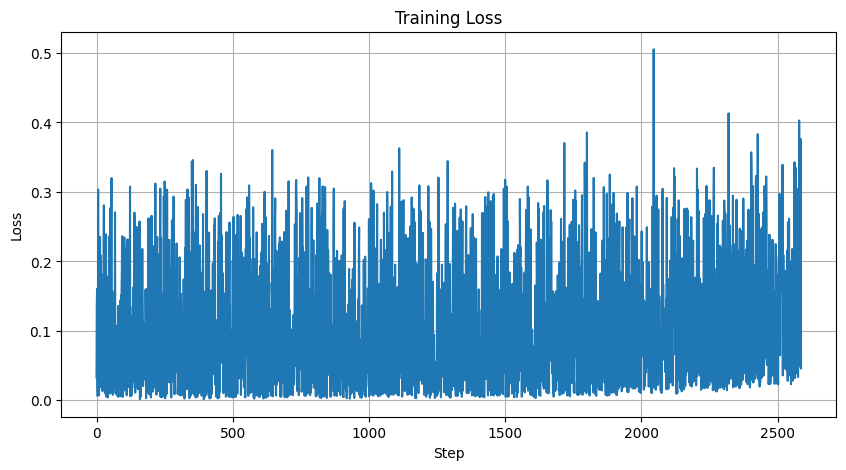


  adding: kaggle/working/naruto/ (stored 0%)
  adding: kaggle/working/naruto/checkpoint-500/ (stored 0%)
  adding: kaggle/working/naruto/checkpoint-500/README.md (deflated 66%)
  adding: kaggle/working/naruto/checkpoint-500/adapter_model.safetensors (deflated 24%)
  adding: kaggle/working/naruto/checkpoint-500/training_state.json (deflated 16%)
  adding: kaggle/working/naruto/checkpoint-500/text_encoder/ (stored 0%)
  adding: kaggle/working/naruto/checkpoint-500/text_encoder/README.md (deflated 66%)
  adding: kaggle/working/naruto/checkpoint-500/text_encoder/adapter_model.safetensors (deflated 25%)
  adding: kaggle/working/naruto/checkpoint-500/text_encoder/adapter_config.json (deflated 56%)
  adding: kaggle/working/naruto/checkpoint-500/adapter_config.json (deflated 57%)
  adding: kaggle/working/naruto/checkpoint-500/text_encoder_2/ (stored 0%)
  adding: kaggle/working/naruto/checkpoint-500/text_encoder_2/README.md (deflated 66%)
  adding: kaggle/working/naruto/checkpoint-500/text_en

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3032

In [ ]:

print("\nSaving final LoRA weights...")
os.makedirs(f"{OUTPUT_DIR}/final", exist_ok=True)
# unet.save_pretrained(f"{OUTPUT_DIR}/final")

# Save as safetensors for ComfyUI/AUTOMATIC1111
# from safetensors.torch import save_file
# lora_state_dict = {}

# # UNet LoRA
# for k, v in unet.state_dict().items():
#     if "lora" in k:
#         lora_state_dict[f"unet.{k}"] = v

# # TE1 LoRA
# for k, v in text_encoder_one.state_dict().items():
#     if "lora" in k:
#         lora_state_dict[f"text_encoder.{k}"] = v

# # TE2 LoRA
# for k, v in text_encoder_two.state_dict().items():
#     if "lora" in k:
#         lora_state_dict[f"text_encoder_2.{k}"] = v

# save_file(lora_state_dict, f"{OUTPUT_DIR}/naruto_sdxl_lora.safetensors")
unet.save_pretrained(f"{OUTPUT_DIR}/final")
text_encoder_one.save_pretrained(f"{OUTPUT_DIR}/final/text_encoder")
text_encoder_two.save_pretrained(f"{OUTPUT_DIR}/final/text_encoder_2")
# Save final training info
final_info = {
    "total_steps": global_step,
    "final_loss": losses[-1] if losses else 0,
    "config": config,
}
with open(f"{OUTPUT_DIR}/final_training_info.json", "w") as f:
    json.dump(final_info, f, indent=2)

print(f"Saved to: {OUTPUT_DIR}/final")
print(f"Safetensors: {OUTPUT_DIR}/naruto_sdxl_lora.safetensors")

# Plot loss curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig(f"{OUTPUT_DIR}/loss_curve.png")
plt.show()

# Download files
print("\nDownloading files...")
from google.colab import files
!zip -r /kaggle/working/naruto_sdxl_lora.zip {OUTPUT_DIR}
files.download('/kaggle/working/naruto_sdxl_lora.zip')



# Clear memory
del text_encoder_one, text_encoder_two
torch.cuda.empty_cache()
gc.collect()

In [8]:
from IPython.display import FileLink
FileLink(r"/kaggle/working/naruto_sdxl_lora.zip")

/kaggle/working/naruto_sdxl_lora.zip

In [ ]:
from IPython.display import FileLink
FileLink(r'zipped_file_name.zip')

🔄 Loading SDXL base models...


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

🔄 Loading LoRA weights...
✅ All LoRA loaded!


  0%|          | 0/30 [00:00<?, ?it/s]

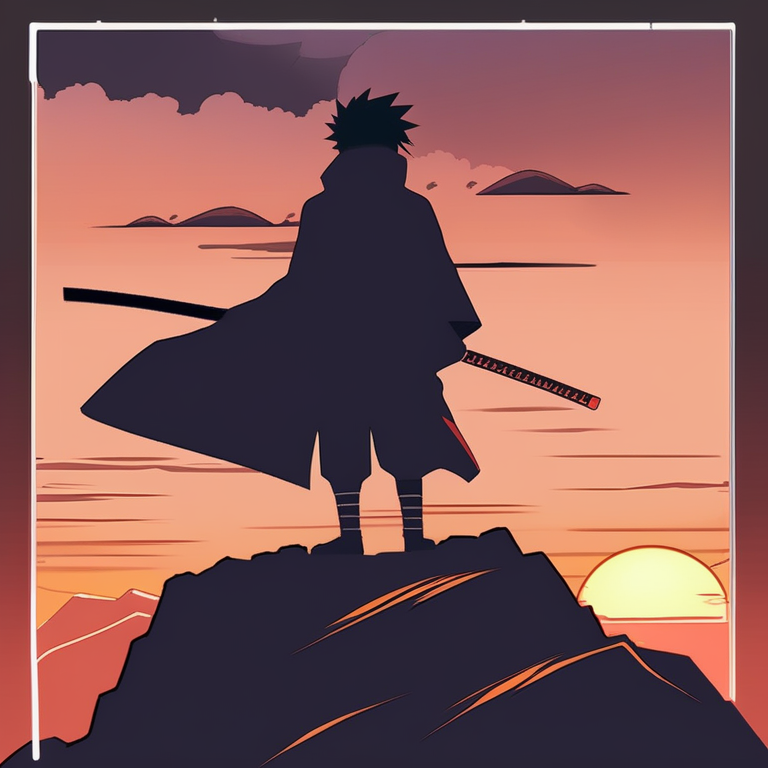

✅ Done!


In [ ]:


import torch
from diffusers import StableDiffusionXLPipeline, DPMSolverMultistepScheduler
from transformers import CLIPTextModel, CLIPTextModelWithProjection
from peft import PeftModel

# ---------------- CONFIGURATION ----------------
MODEL_ID = "stabilityai/stable-diffusion-xl-base-1.0"
LORA_PATH = "/kaggle/working/naruto/checkpoint-50"

print("Loading SDXL base models...")

pipe = StableDiffusionXLPipeline.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda:1")

print("Loading LoRA weights...")

# Load UNet LoRA
pipe.unet = PeftModel.from_pretrained(pipe.unet, LORA_PATH)
pipe.unet = pipe.unet.merge_and_unload()

# Load Text Encoder 1 LoRA
pipe.text_encoder = PeftModel.from_pretrained(
    pipe.text_encoder, 
    f"{LORA_PATH}/text_encoder"
)
pipe.text_encoder = pipe.text_encoder.merge_and_unload()

# Load Text Encoder 2 LoRA
pipe.text_encoder_2 = PeftModel.from_pretrained(
    pipe.text_encoder_2, 
    f"{LORA_PATH}/text_encoder_2"
)
pipe.text_encoder_2 = pipe.text_encoder_2.merge_and_unload()

# Optimizations
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_vae_slicing()

print("All LoRA loaded!")

prompt = "naruto style, bill gates"
# negative_prompt = "blurry, bad quality"

image = pipe(
    prompt=prompt,
    # negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=768,
    width=768
).images[0]

image.save("output.png")
display(image)
print("Done!")

  0%|          | 0/30 [00:00<?, ?it/s]

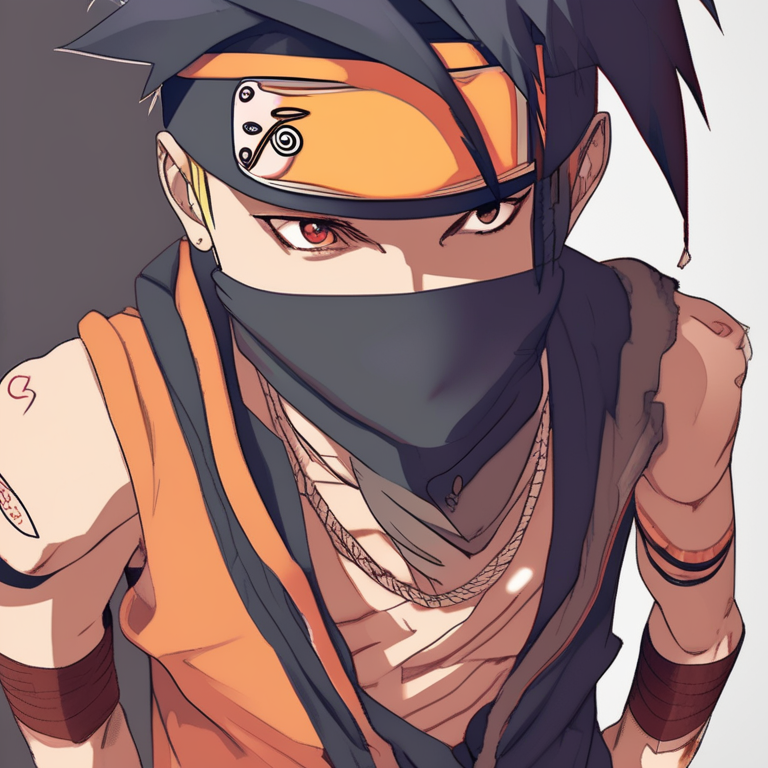

✅ Done!


In [10]:
prompt = "naruto style, indian boy"
# negative_prompt = "blurry, bad quality"

image = pipe(
    prompt=prompt,
    # negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=768,
    width=768
).images[0]

image.save("output.png")
display(image)
print("✅ Done!")

  0%|          | 0/30 [00:00<?, ?it/s]

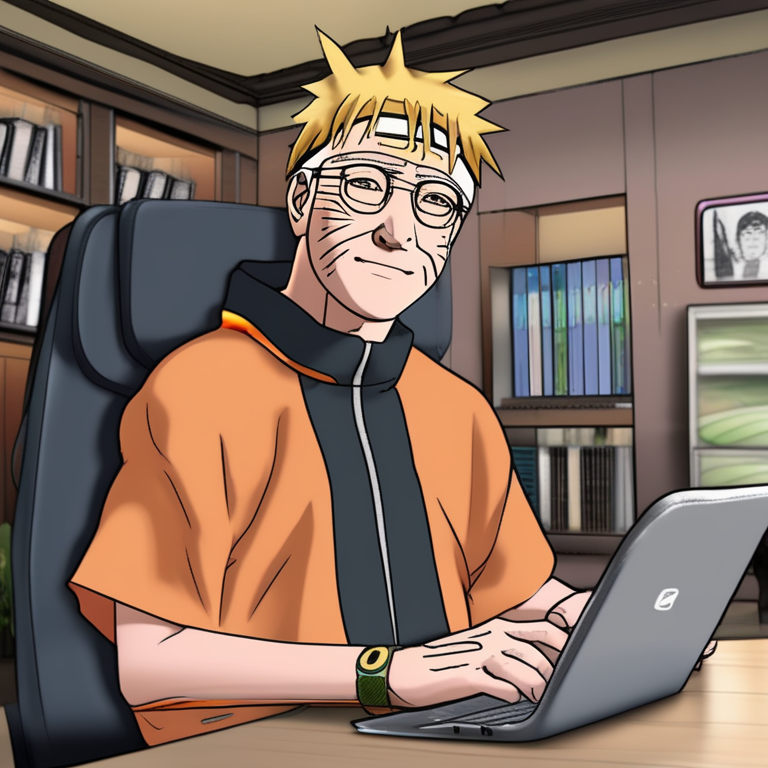

✅ Done!


In [11]:
prompt = "naruto style, bill gates"
# negative_prompt = "blurry, bad quality"

image = pipe(
    prompt=prompt,
    # negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=768,
    width=768
).images[0]

image.save("output.png")
display(image)
print("✅ Done!")

  0%|          | 0/30 [00:00<?, ?it/s]

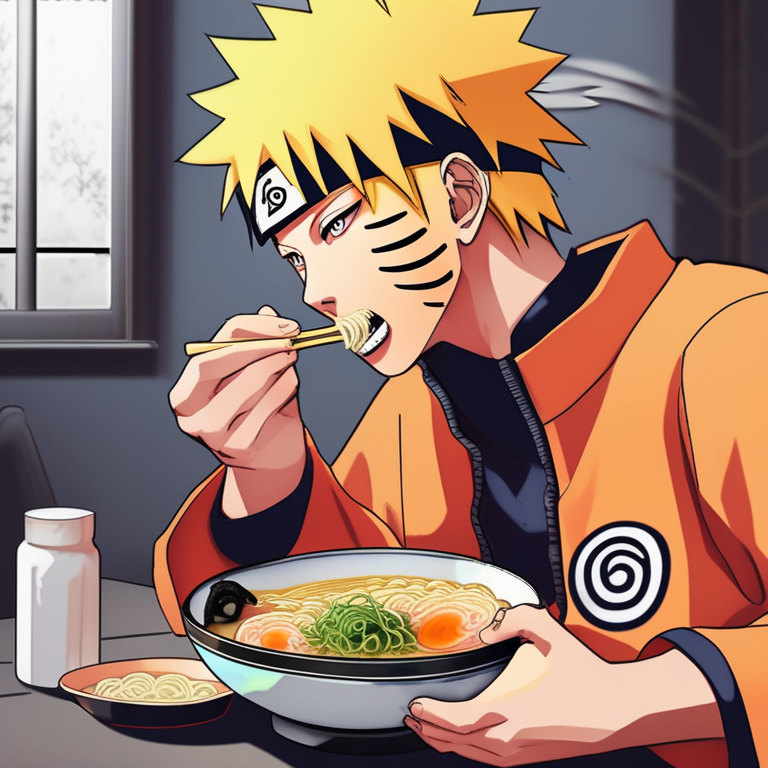

✅ Done!


In [12]:
prompt = "naruto style, Naruto Uzumaki eating ramen"
# negative_prompt = "blurry, bad quality"

image = pipe(
    prompt=prompt,
    # negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=768,
    width=768
).images[0]

image.save("output.png")
display(image)
print("✅ Done!")

  0%|          | 0/30 [00:00<?, ?it/s]

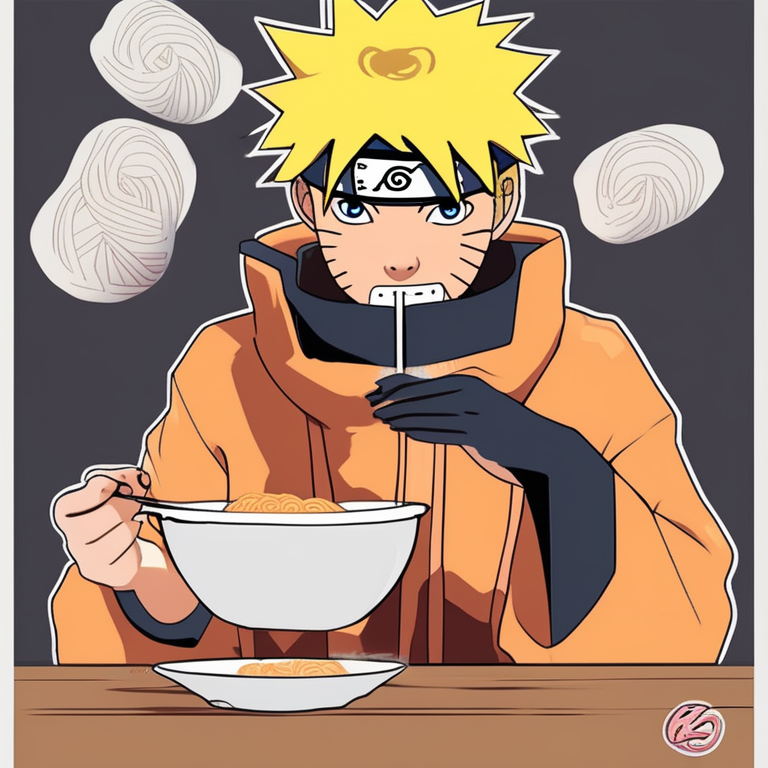

✅ Done!


In [13]:
prompt = "naruto style, Naruto Uzumaki eating ramen"
# negative_prompt = "blurry, bad quality"

image = pipe(
    prompt=prompt,
    # negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=768,
    width=768
).images[0]

image.save("output.png")
display(image)
print("✅ Done!")

  0%|          | 0/30 [00:00<?, ?it/s]

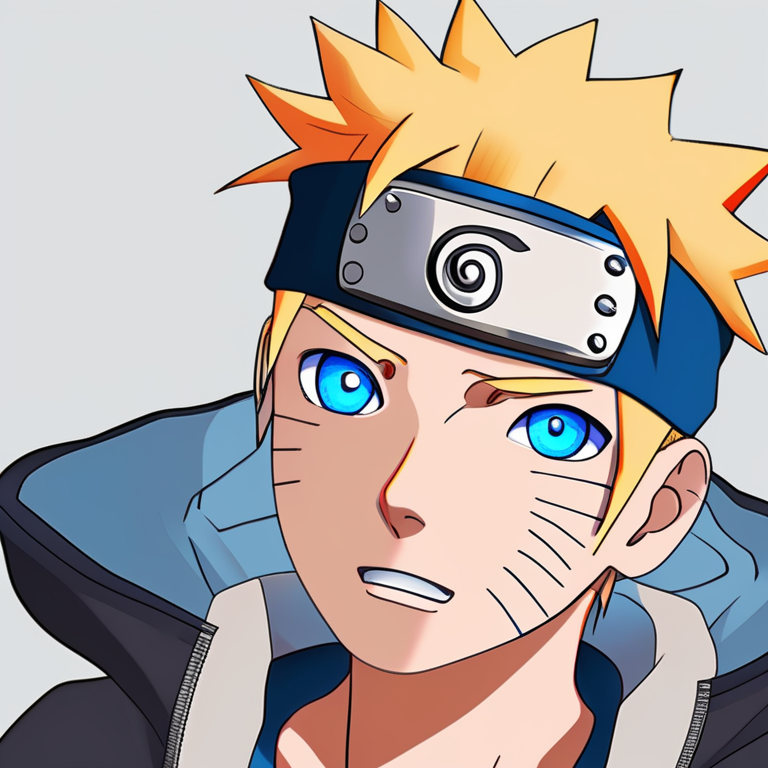

✅ Done!


In [14]:
prompt = "naruto style, boy with blue eyes"
# negative_prompt = "blurry, bad quality"

image = pipe(
    prompt=prompt,
    # negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=768,
    width=768
).images[0]

image.save("output.png")
display(image)
print("✅ Done!")